In [24]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import codecs
import pandas as pd
from nltk.corpus import stopwords, wordnet 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    replace_dash = stop_free.replace("-", " ")
    punc_free = ''.join(ch for ch in replace_dash if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized 

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        return [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        

In [33]:
with codecs.open('data/inaug_speeches.csv', 'r', encoding='utf-8', errors='ignore') as fdata:
    df = pd.read_csv(fdata)
    
# Topic Modeling
document = []
dictionary = {}
for idx, d in df['text'].iteritems():
    d = d.replace('0092', '')
    d = d.replace('0097', '')
    document = d.split('. ')
    year = int(df.loc[idx]['Date'][-4:])
    no_features = 1
    # NMF is able to use tf-idf
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(document)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()

    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(stop_words='english')
    tf = tf_vectorizer.fit_transform(document)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    no_topics = 1
    # Run NMF
    nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

    # Run LDA
    lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

    no_top_words = 5
    print(dictionary.update({year: [display_topics(nmf, tfidf_feature_names, no_top_words), display_topics(lda, tf_feature_names, no_top_words)]}))
    
    

/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics

None
None
None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


None
None
None


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [31]:
# Count Total Word Uses
import collections

with codecs.open('data/inaug_speeches.csv', 'r', encoding='utf-8', errors='ignore') as fdata:
    df = pd.read_csv(fdata)

inaug_df = pd.DataFrame(index=[], columns=[])
for idx, d in df['text'].iteritems():
    d = d.replace('<U+0092>', ' ')
    d = d.replace('<U+0097>', ' ')
    words = clean(d)
    tokens = words.split(' ')
    year = int(df.loc[idx]['Date'][-4:])
    words_df = pd.DataFrame.from_dict(collections.Counter(tokens), orient='index').reset_index()
    words_df = words_df.rename(columns={0:year})
    words_df.iloc[:, 1] = words_df.iloc[:, 1] / len(tokens)
    inaug_df = pd.concat([words_df, inaug_df], axis=0)

/Users/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



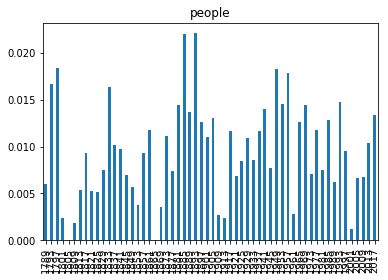

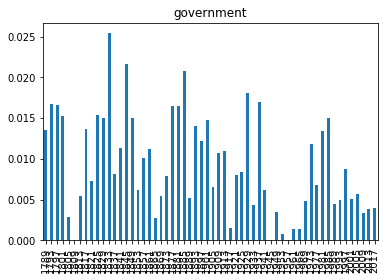

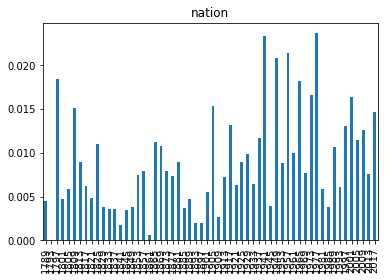

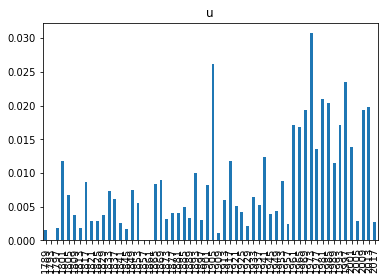

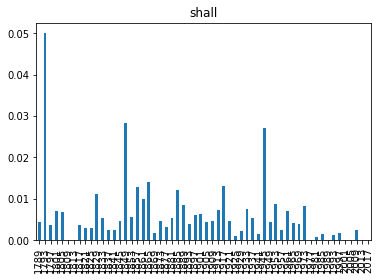

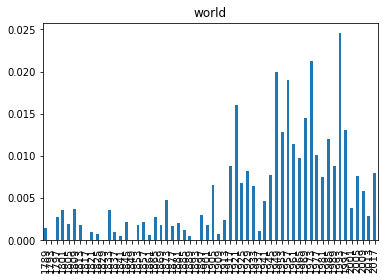

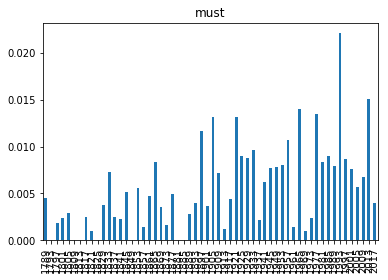

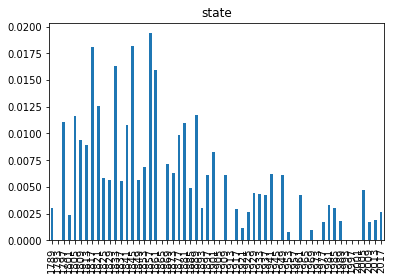

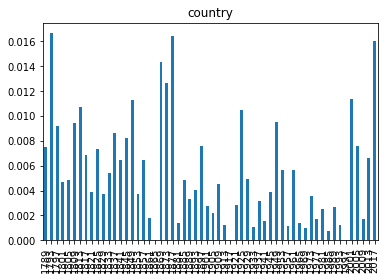

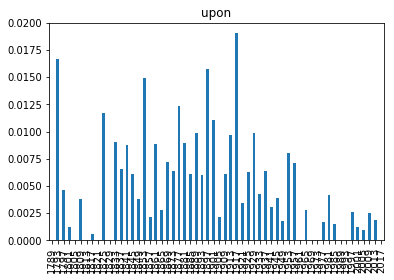

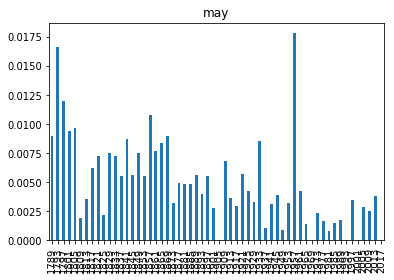

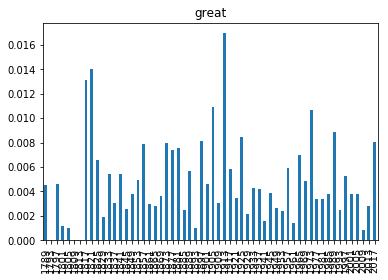

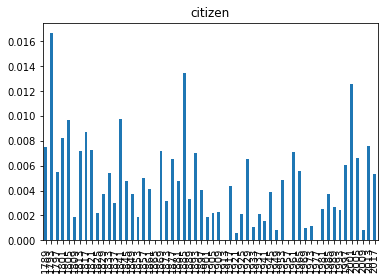

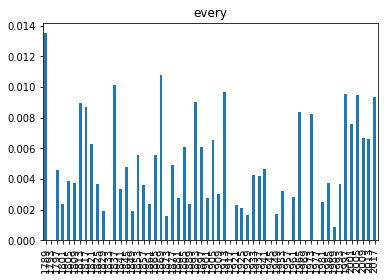

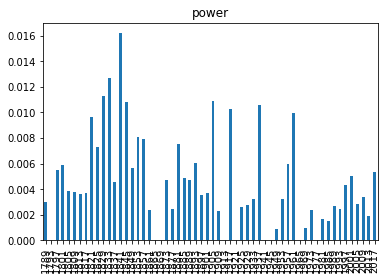

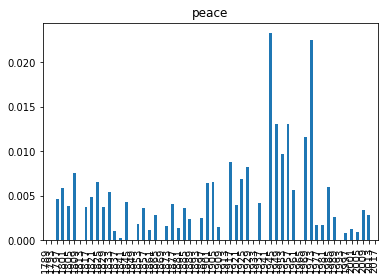

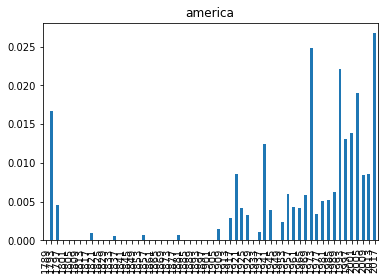

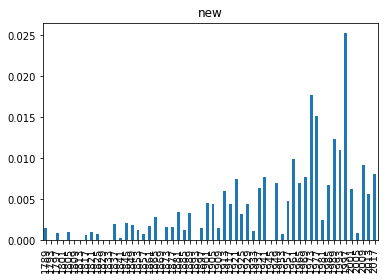

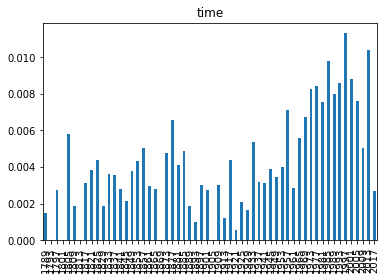

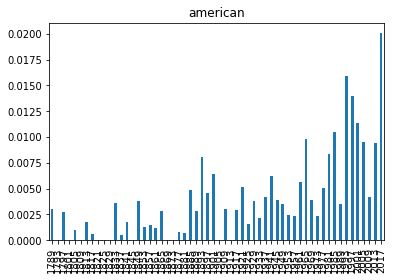

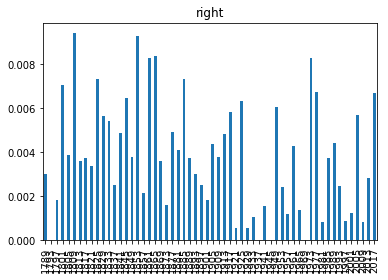

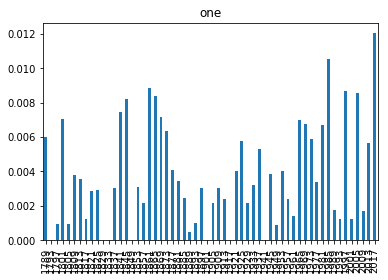

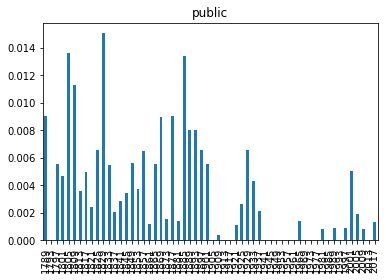

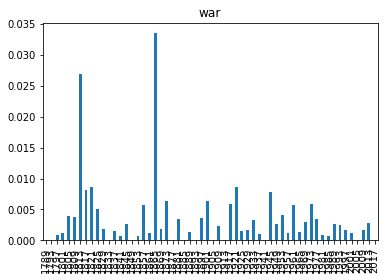

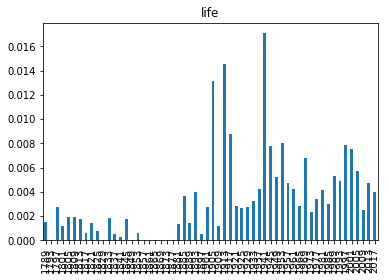

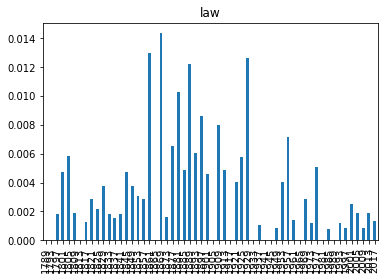

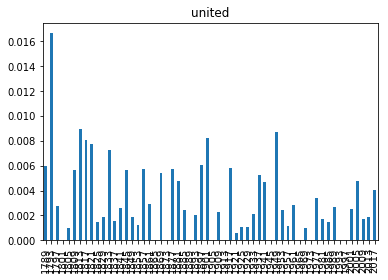

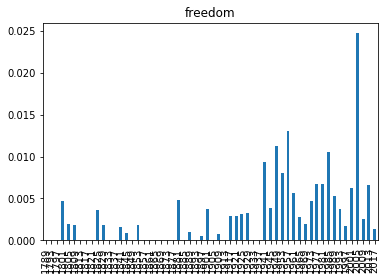

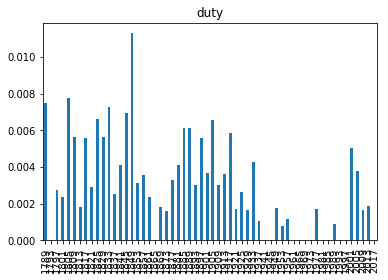

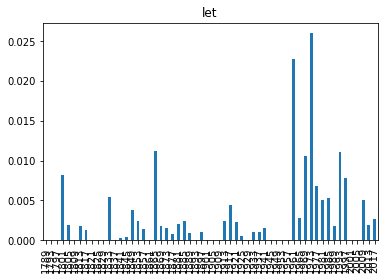

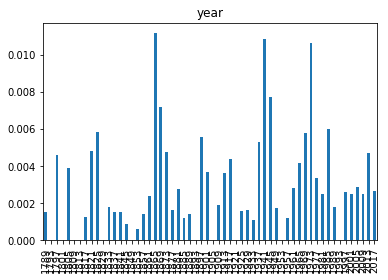

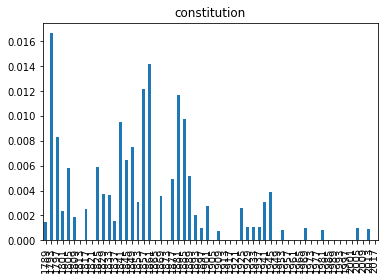

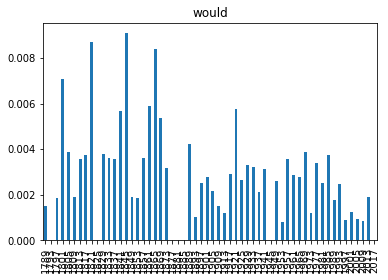

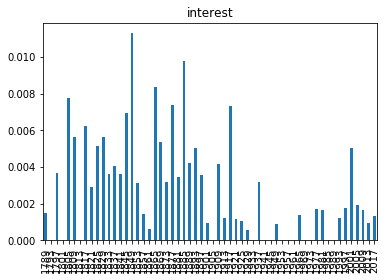

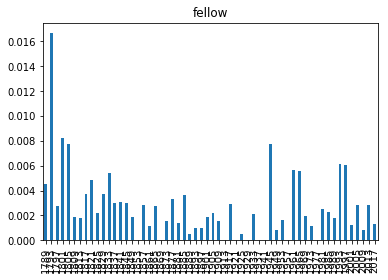

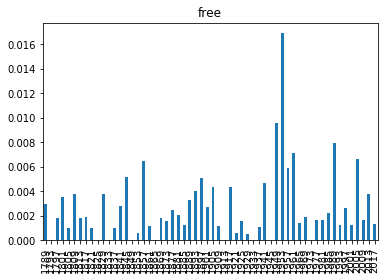

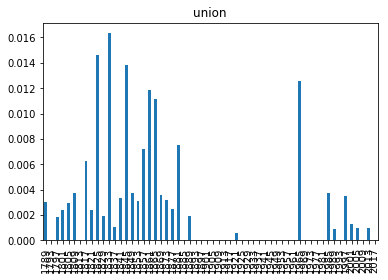

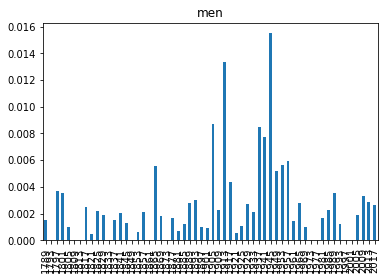

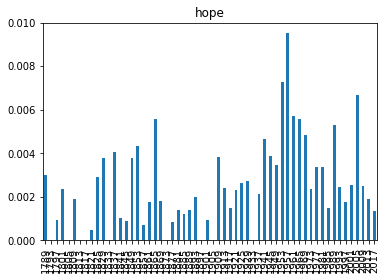

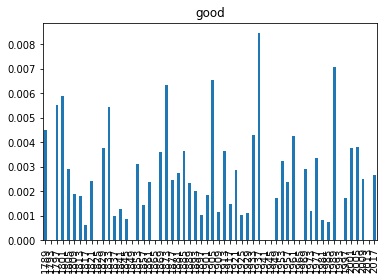

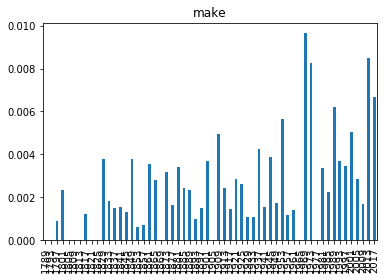

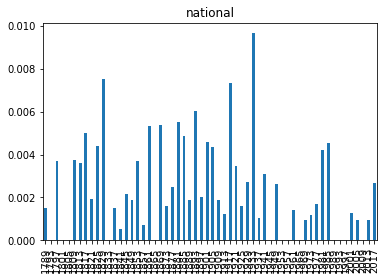

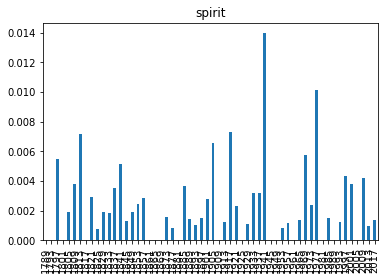

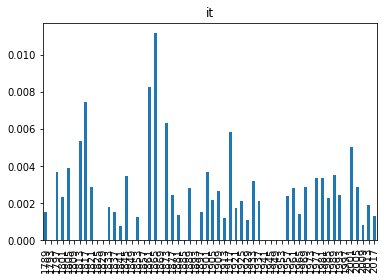

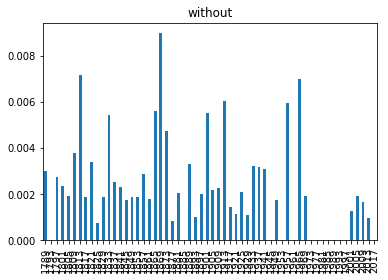

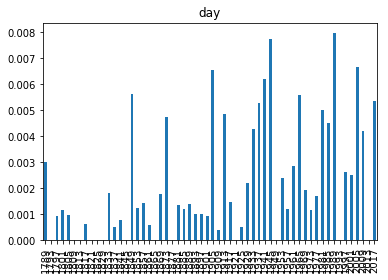

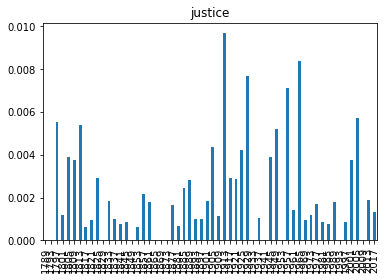

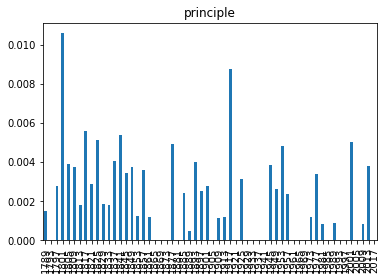

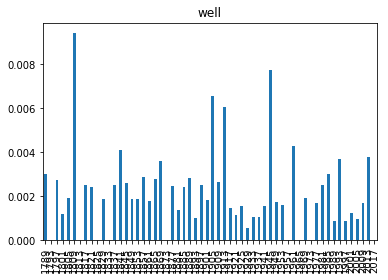

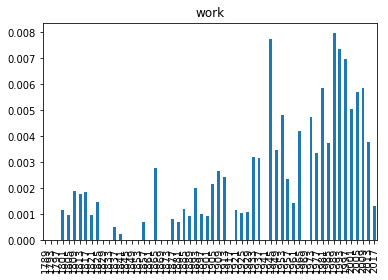

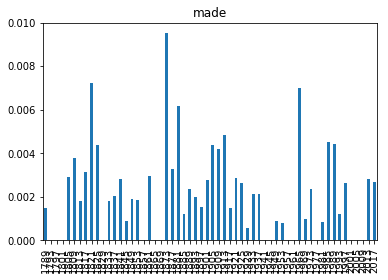

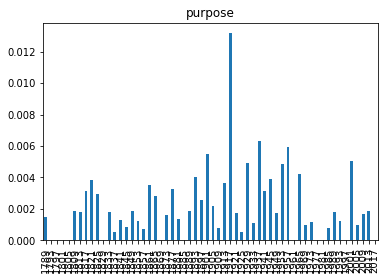

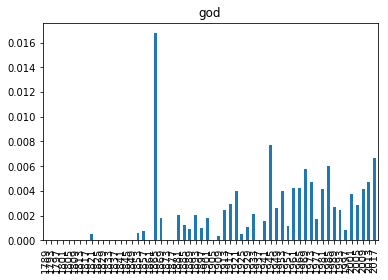

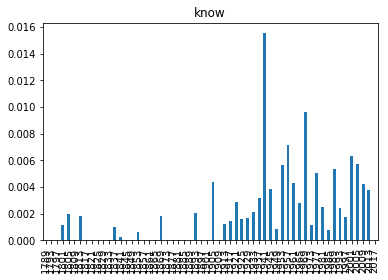

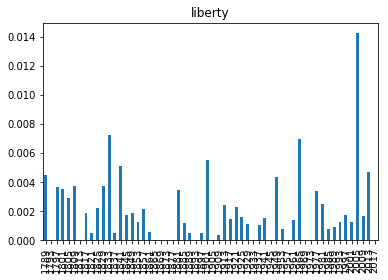

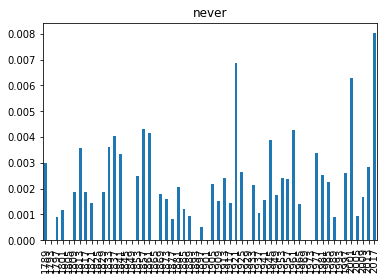

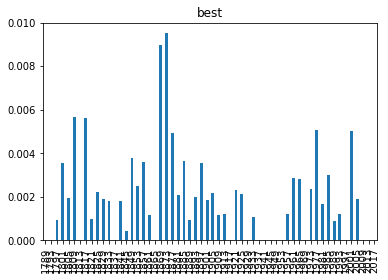

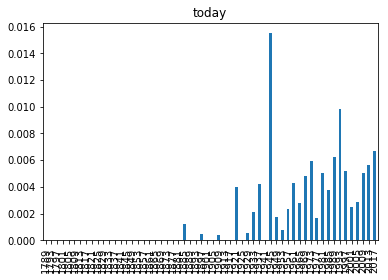

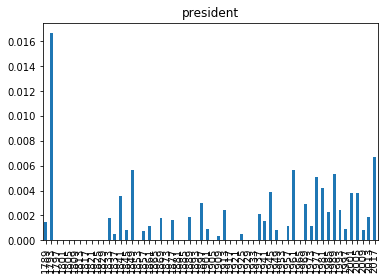

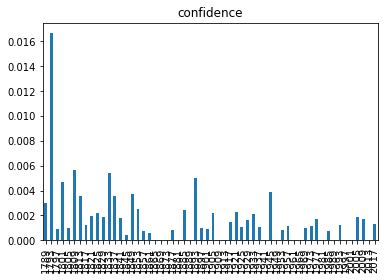

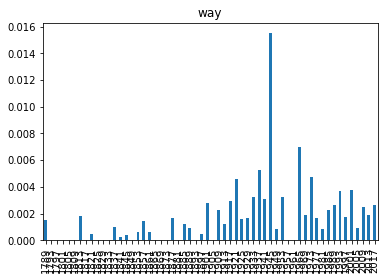

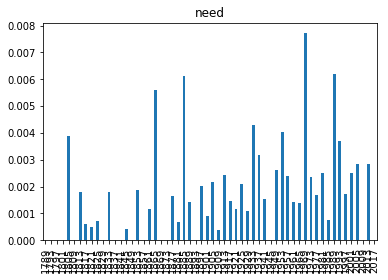

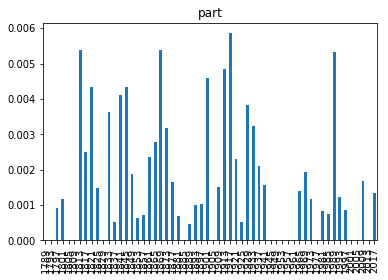

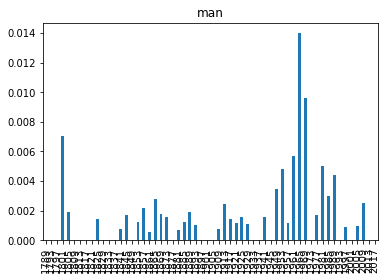

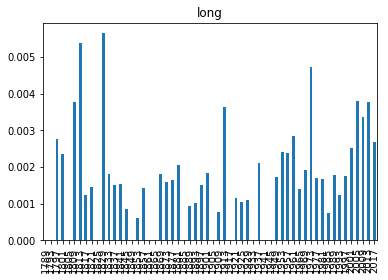

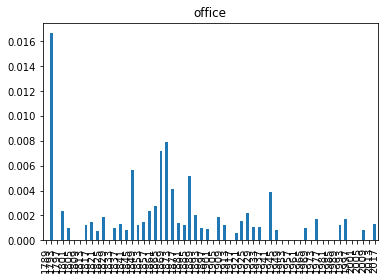

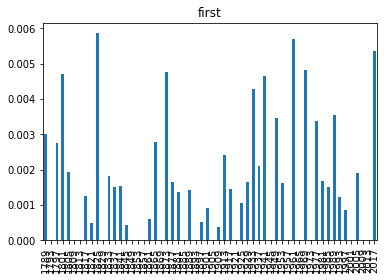

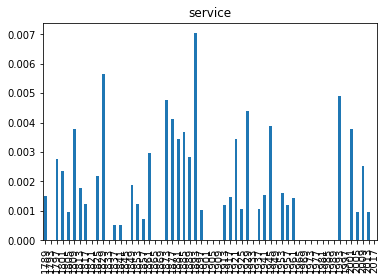

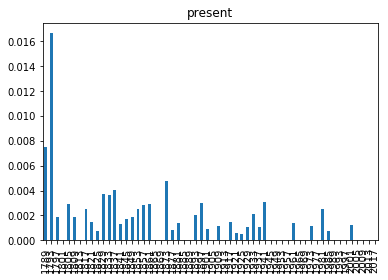

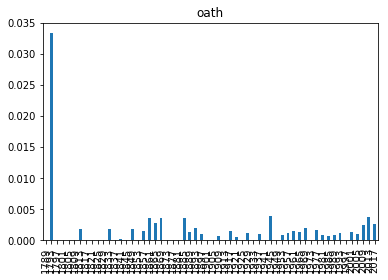

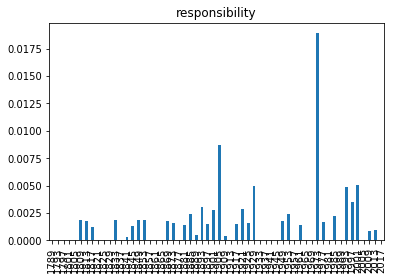

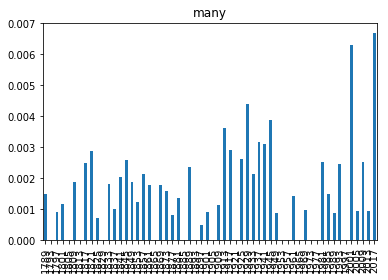

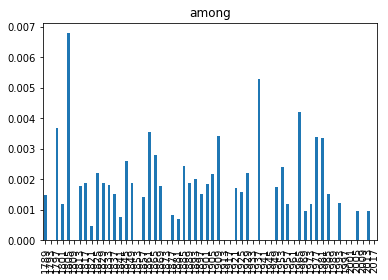

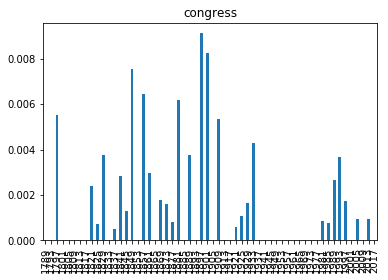

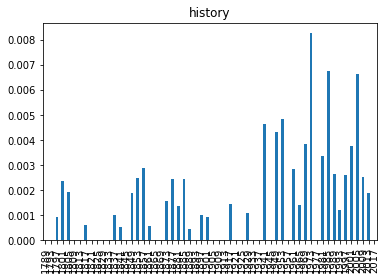

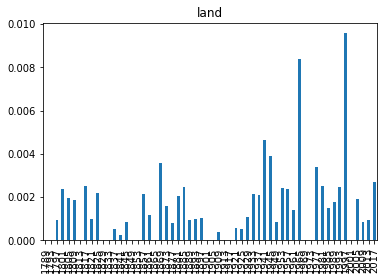

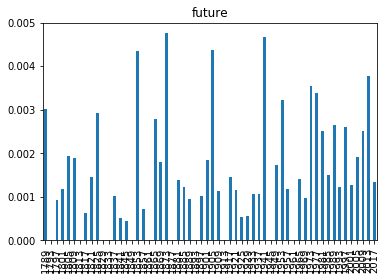

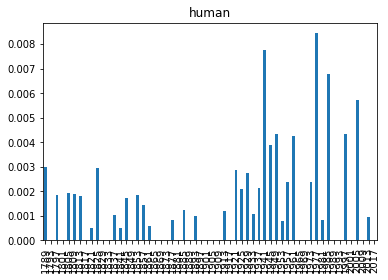

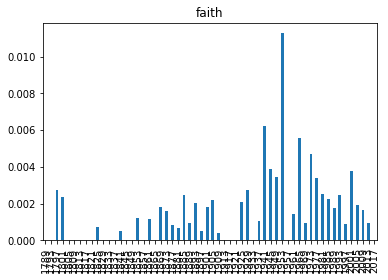

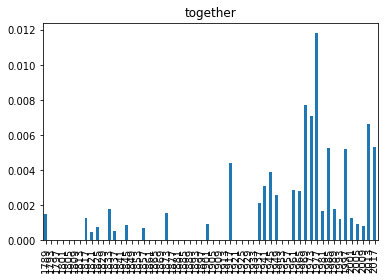

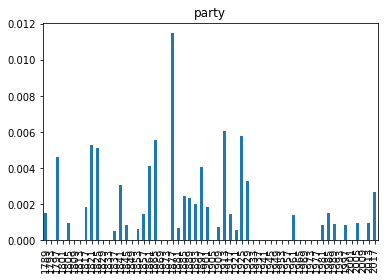

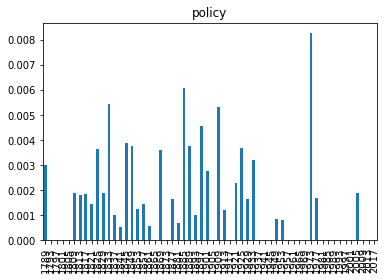

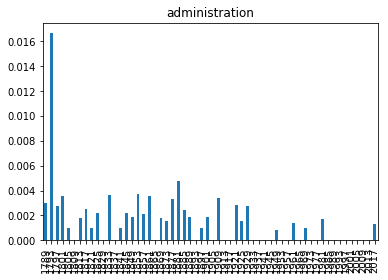

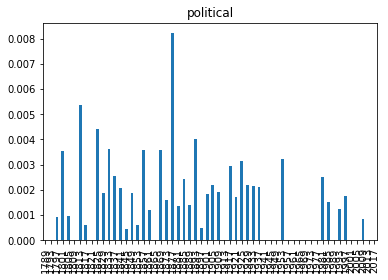

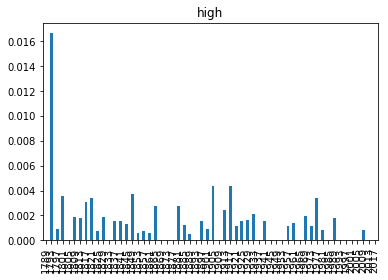

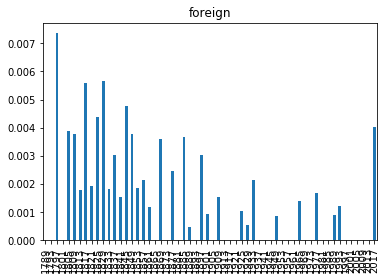

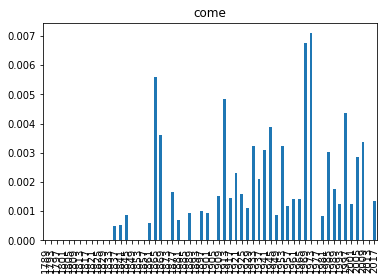

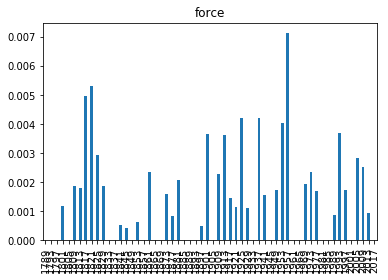

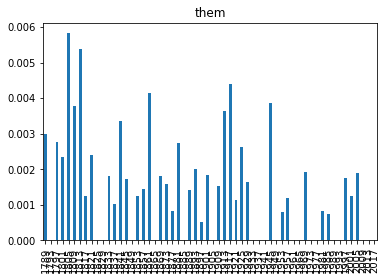

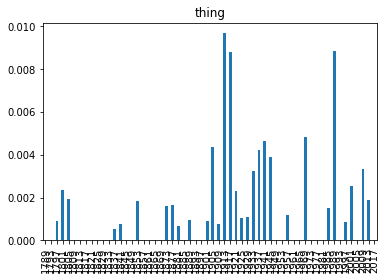

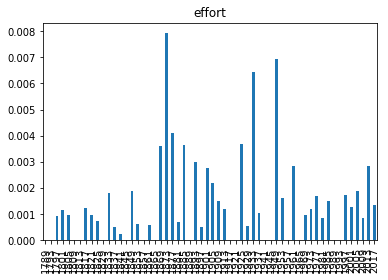

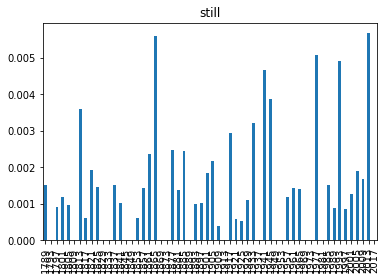

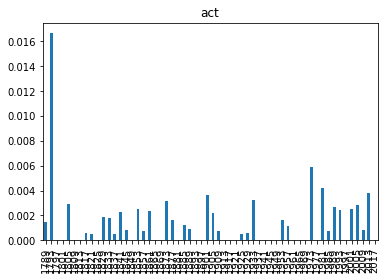

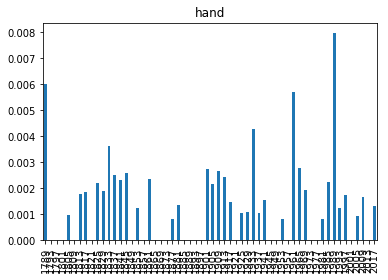

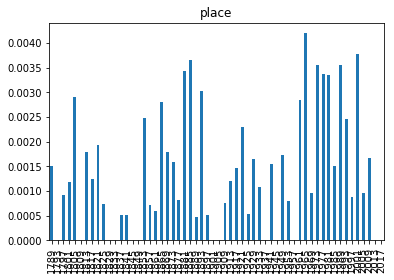

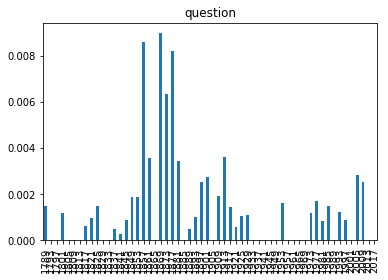

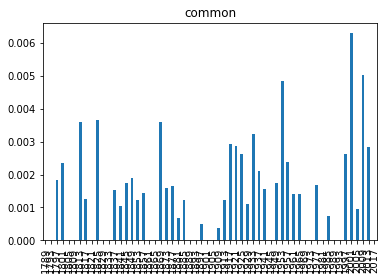

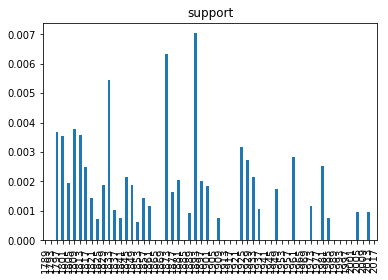

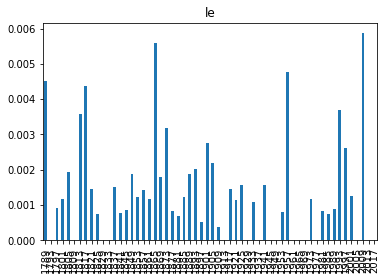

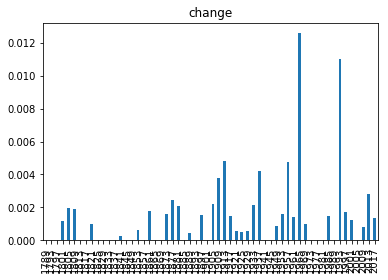

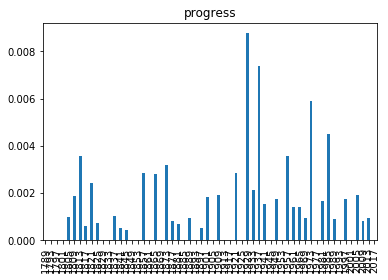

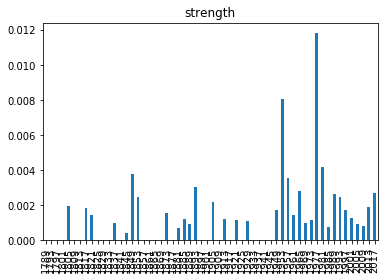

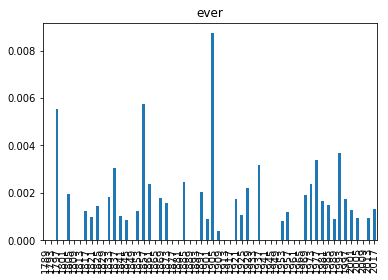

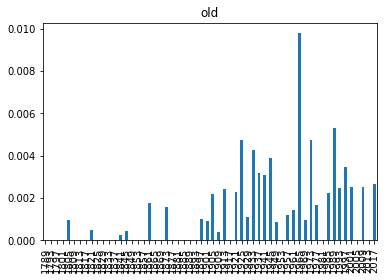

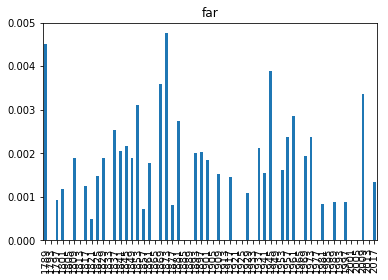

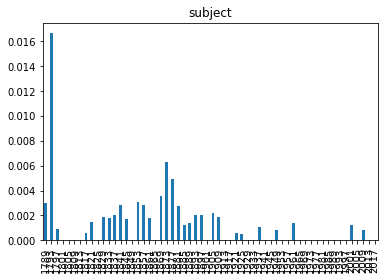

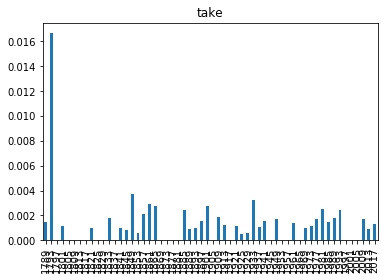

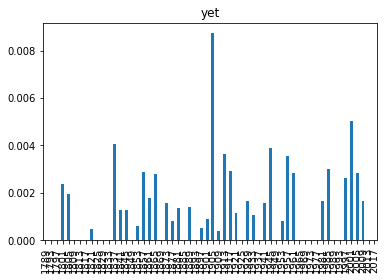

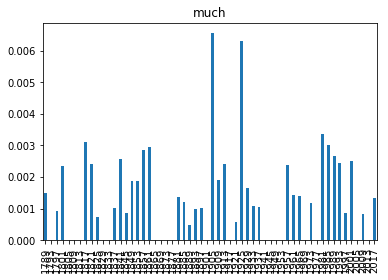

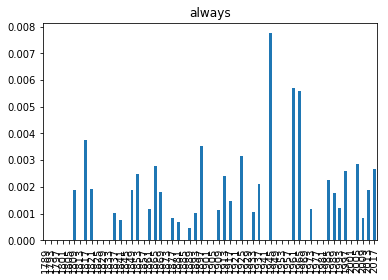

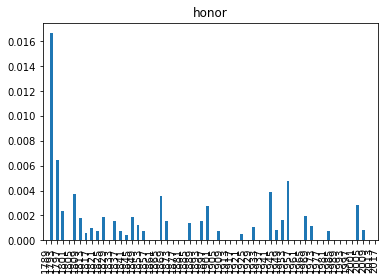

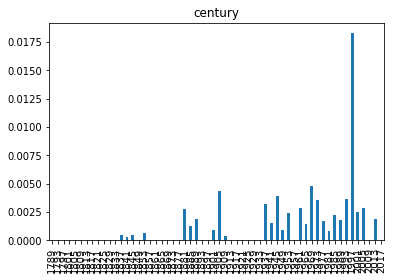

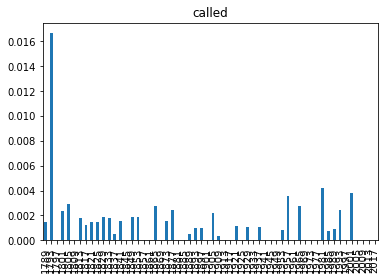

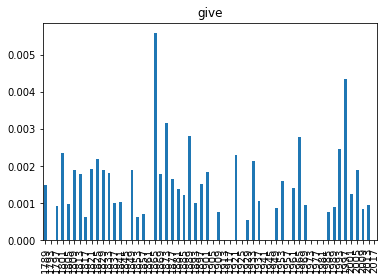

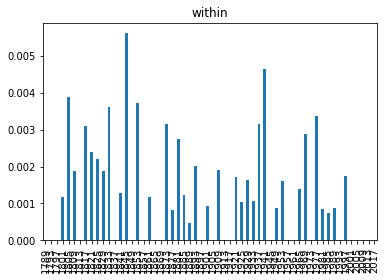

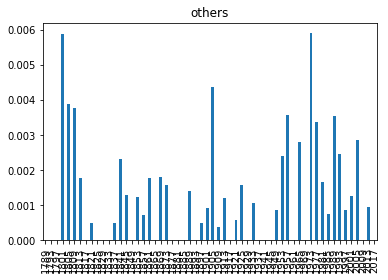

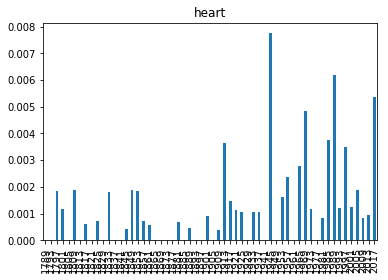

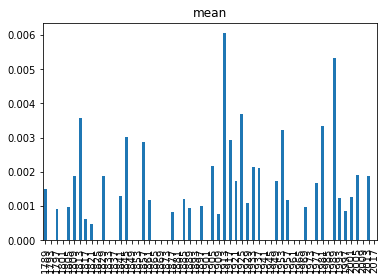

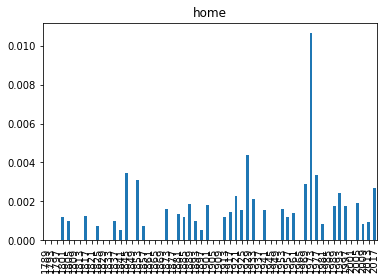

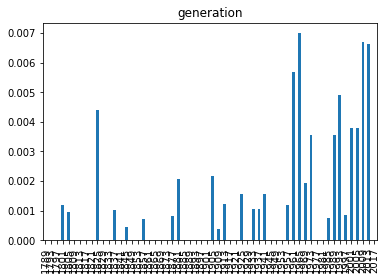

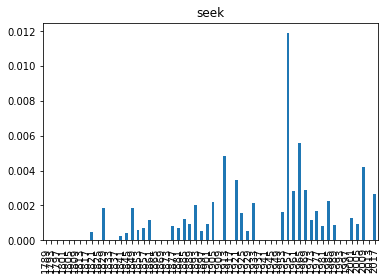

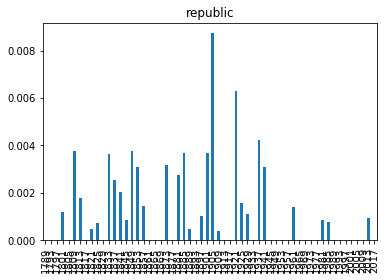

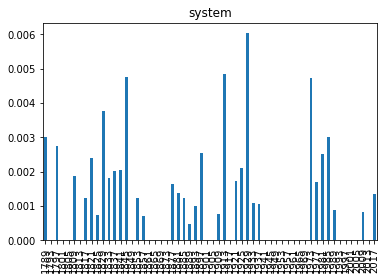

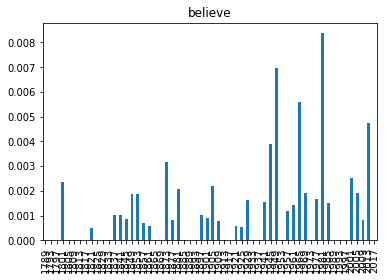

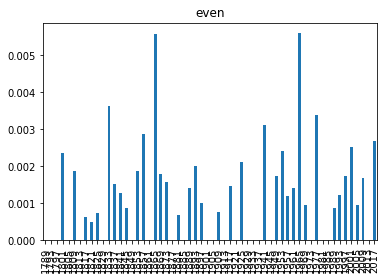

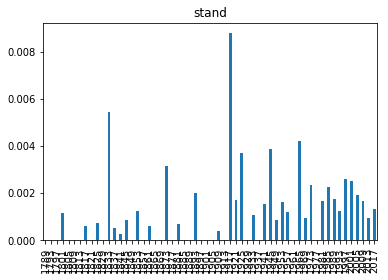

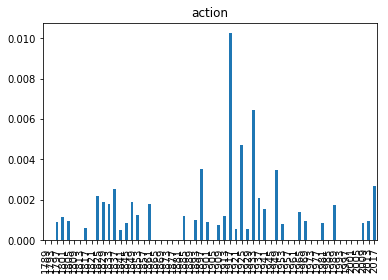

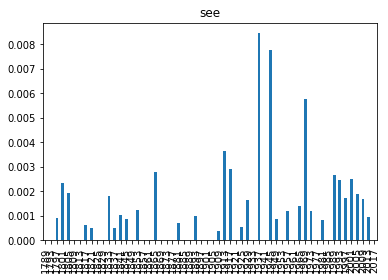

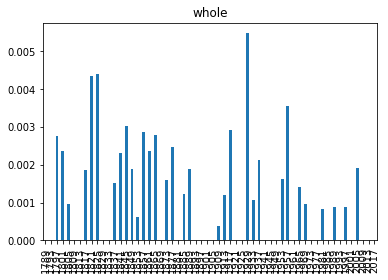

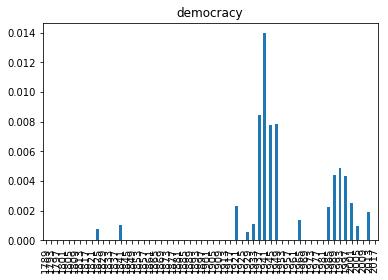

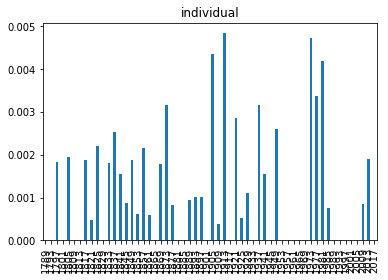

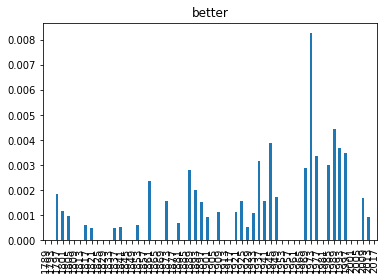

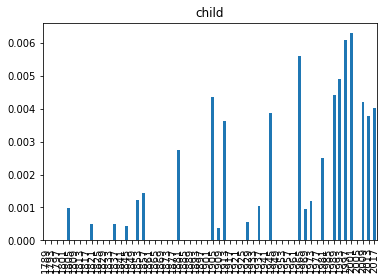

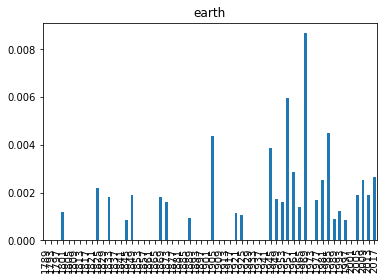

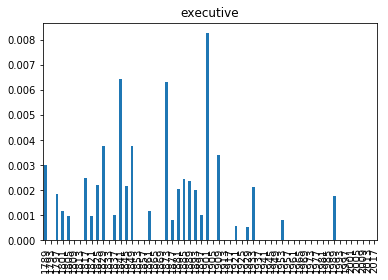

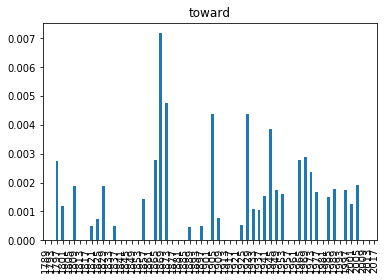

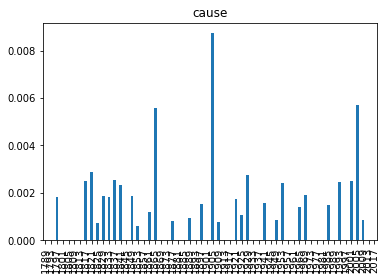

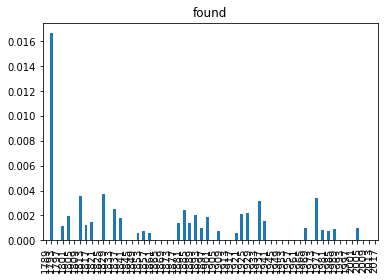

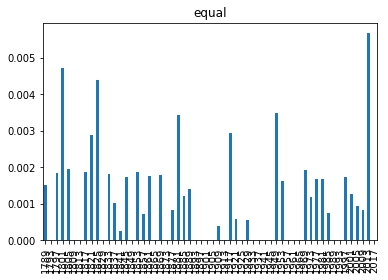

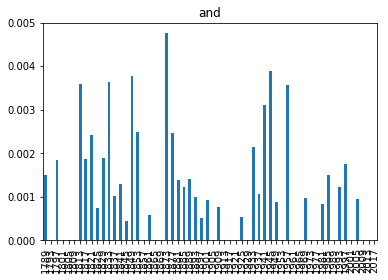

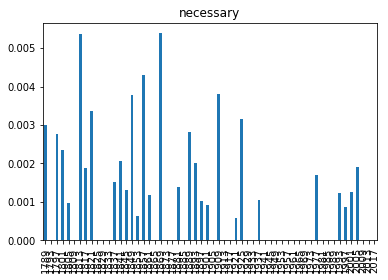

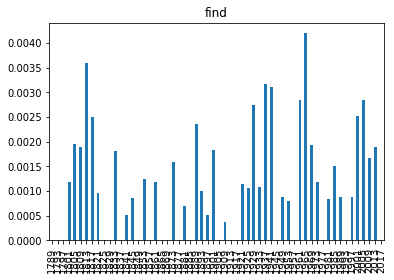

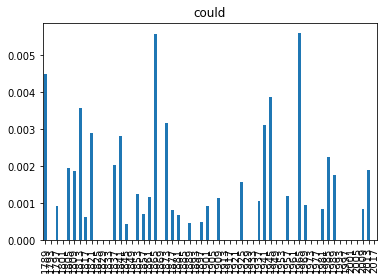

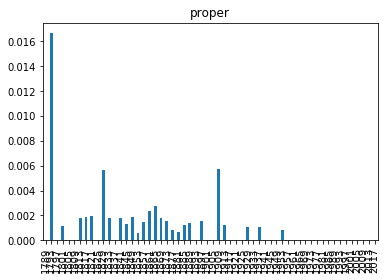

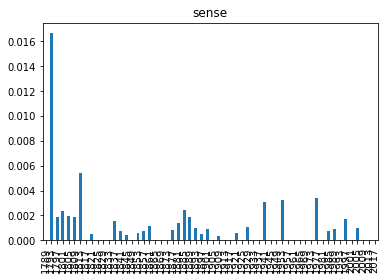

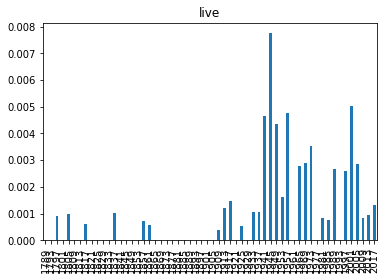

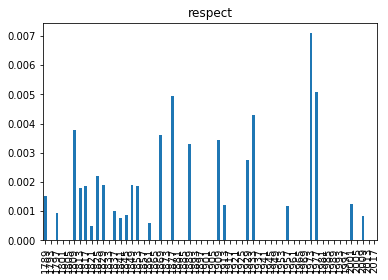

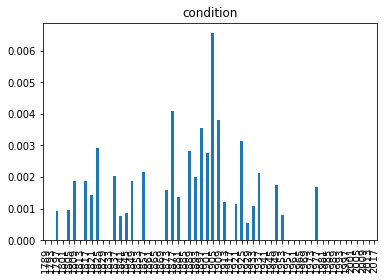

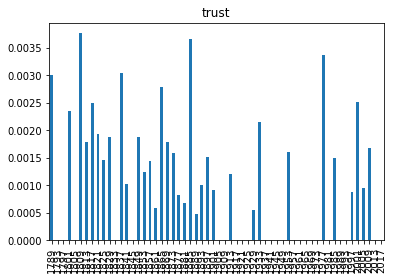

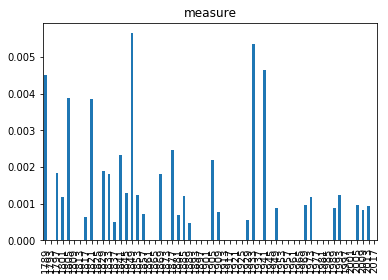

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

inaug_df.fillna(0)
grouped = inaug_df.groupby('index').sum()
grouped['total'] = grouped.sum(axis = 1, skipna = True)
grouped = grouped.sort_values('total', ascending=False)

for i in range(150):
    top_df = grouped.iloc[i]
    top_df = top_df[:-1]
    top_df = top_df.iloc[::-1]
    top_df.plot.bar(title=top_df.name)
    plt.show()

In [193]:
grouped

,2017,2013,2009,2005,2001,1997,1993,1989,1985,1981,...,1821,1817,1813,1809,1805,1801,1797,1793,1789,total
index,,,,,,,,,,,,,,,,,,,,,
people,0.013369,0.010397,0.006706,0.006654,0.001259,0.009574,0.014724,0.006200,0.012792,0.007538,...,0.005304,0.009346,0.005376,0.001883,0.000000,0.002356,0.018399,0.016667,0.006006,0.556318
government,0.004011,0.003781,0.003353,0.005703,0.005038,0.008703,0.004908,0.004429,0.015049,0.013400,...,0.007232,0.013707,0.005376,0.000000,0.002913,0.015312,0.016559,0.016667,0.013514,0.537000
nation,0.014706,0.007561,0.012573,0.011407,0.016373,0.013055,0.006135,0.010629,0.003762,0.005863,...,0.004822,0.006231,0.008961,0.015066,0.005825,0.004711,0.018399,0.000000,0.004505,0.517486
u,0.002674,0.019849,0.019279,0.002852,0.013854,0.023499,0.017178,0.011515,0.020316,0.020938,...,0.002893,0.008723,0.001792,0.003766,0.006796,0.011779,0.001840,0.000000,0.001502,0.484449
shall,0.000000,0.000000,0.002515,0.000000,0.000000,0.001741,0.001227,0.000000,0.001505,0.000838,...,0.002893,0.003738,0.000000,0.000000,0.006796,0.007067,0.003680,0.050000,0.004505,0.357061
world,0.008021,0.002836,0.005868,0.007605,0.003778,0.013055,0.024540,0.008857,0.012039,0.007538,...,0.000964,0.000000,0.001792,0.003766,0.001942,0.003534,0.002760,0.000000,0.001502,0.331164
must,0.004011,0.015123,0.006706,0.005703,0.007557,0.008703,0.022086,0.007972,0.009029,0.008375,...,0.000964,0.002492,0.000000,0.000000,0.002913,0.002356,0.001840,0.000000,0.004505,0.325203
state,0.002674,0.001890,0.001676,0.004753,0.000000,0.000000,0.000000,0.001771,0.003010,0.003350,...,0.012536,0.018069,0.008961,0.009416,0.011650,0.002356,0.011040,0.000000,0.003003,0.320442
country,0.016043,0.006616,0.001676,0.007605,0.011335,0.000000,0.001227,0.002657,0.000752,0.002513,...,0.003857,0.006854,0.010753,0.009416,0.004854,0.004711,0.009200,0.016667,0.007508,0.320311


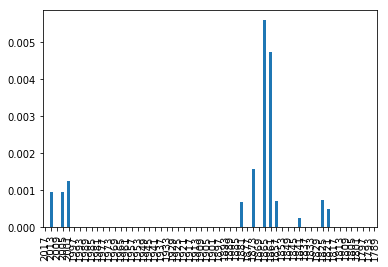

In [189]:
grouped.loc[''][:-1].plot.bar()

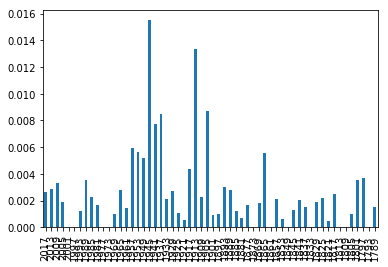

In [199]:
grouped.loc['men'][:-1].plot.bar()

'            My fellow citizens:Today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter. But, by the words we speak and the faces we show the world, we force the spring. A spring reborn in the world\'s oldest democracy, that brings forth the vision and courage to reinvent America. When our founders boldly declared America\'s independence to the world and our purposes to the Almighty, they knew that America, to endure, would have to change. Not change for change\'s sake, but change to preserve America\'s ideals<U+0097>life, liberty, the pursuit of happiness. Though we march to the music of our time, our mission is timeless. Each generation of Americans must define what it means to be an American. On behalf of our nation, I salute my predecessor, President Bush, for his half-century of service to America. And I thank the millions of men and women whose steadfastness and sacrifice triumphed over Depression, fascism and Communism. Today, a generatio

NameError: name 'df' is not defined

In [8]:
from nltk.corpus import wordnet as wn

dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

In [9]:
from nltk.corpus import wordnet_ic
import nltk
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet_ic to
[nltk_data]     /Users/owner/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


True

In [10]:
brown_ic = wordnet_ic.ic('ic-brown.dat')

In [13]:
cat.jcn_similarity(dog, brown_ic)

0.4497755285516739

In [34]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

with codecs.open('data/inaug_speeches.csv', 'r', encoding='utf-8', errors='ignore') as fdata:
    df = pd.read_csv(fdata)
    
# Topic Modeling
document = []
dictionary = {}
for idx, d in df['text'].iteritems():
    d = d.replace('0092', '')
    d = d.replace('0097', '')
    document = d.split('. ')
    year = int(df.loc[idx]['Date'][-4:])
    no_features = 1
    # NMF is able to use tf-idf
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(document)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()

    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(stop_words='english')
    tf = tf_vectorizer.fit_transform(document)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    no_topics = 1
    # Run NMF
    nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

    # Run LDA
    lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

    no_top_words = 5
    
    display_topics(nmf, tfidf_feature_names, no_top_words)
    display_topics(lda, tf_feature_names, no_top_words)

/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
expresses homage author tendering large
Topic 0:
government public country present citizens
Topic 0:
witnesses punishment administration ceremony constitutional
Topic 0:
shall oath entertain america act
Topic 0:
country employed transactions abroad saw
Topic 0:
people government nations country states
Topic 0:
fellow citizens assigned post repair
Topic 0:
government citizens fellow let shall


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
fellow citizens best home ill
Topic 0:
public citizens fellow state shall
Topic 0:
nations indulging repose obligations neutral
Topic 0:
public nations country states rights
Topic 0:
amply sufficient bring resources issue
Topic 0:
war country united british spirit
Topic 0:
states united discharge organization dread
Topic 0:
government states great people united
Topic 0:
states united commerce interests force
Topic 0:
citizens great government fellow shall


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
rights state respect preserve equal
Topic 0:
union government rights country great
Topic 0:
public desirable prompt specific wisdom
Topic 0:
public shall government power people
Topic 0:
preservation states union integrity rights
Topic 0:
government people union states powers


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
utmost shall ability carry endeavor
Topic 0:
people institutions country government power
Topic 0:
power states constitution government united
Topic 0:
power people government citizens constitution


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
powers delegated states reserved government
Topic 0:
government states foreign people country
Topic 0:
able new cooperation happily performance
Topic 0:
shall government country duties constitution
Topic 0:
states exists believe constitution servitude
Topic 0:
power government shall nation states


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
states constitution territory united people
Topic 0:
states shall constitution government people
Topic 0:
constitution expressly say does territories
Topic 0:
constitution people union states government
Topic 0:
war knew cause let perish
Topic 0:
war god shall union let
Topic 0:
ability best determination appoint design
Topic 0:
country public laws dollar best


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
santo domingo proposition people entertained
Topic 0:
country people best office great
Topic 0:
officers service public desired owe
Topic 0:
country government states public political


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
united states disfranchised peasantry permanent
Topic 0:
government people constitution states union
Topic 0:
affectionate object solicitude people government
Topic 0:
people government public shall constitution


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
law abiding virtuous prosperous people
Topic 0:
people shall respect states public
Topic 0:
bane republican peril constant institutions
Topic 0:
people government american public support


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
government present permanent condition times
Topic 0:
people government congress great country
Topic 0:
war making portion waging philippine
Topic 0:
government people executive united congress
Topic 0:
important relations world powers fail
Topic 0:
people life problems nation great


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
navy army suitable afford improvised
Topic 0:
race government business law employees
Topic 0:
great life things moral force
Topic 0:
great men government justice life
Topic 0:
stand imperative platform purpose action
Topic 0:
shall purpose action peace people


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
new world order come trade
Topic 0:
world god america government responsibility
Topic 0:
country belongs property computation believes
Topic 0:
country people great government law


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
peace world desire maintained contributed
Topic 0:
government people progress peace public
Topic 0:
discipline leadership direction asked willing
Topic 0:
national people helped leadership shall
Topic 0:
progress times depression obvious hold
Topic 0:
government people nation men democracy


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
spirit america faith understand greatest
Topic 0:
nation know spirit life democracy
Topic 0:
shall strive achieve perfection immediately
Topic 0:
shall peace learned men today


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
recovery world economic peace trade
Topic 0:
world nations peace freedom people
Topic 0:
free men faith world belongs
Topic 0:
free world faith peace shall


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
world home change fear people
Topic 0:
world nations peace freedom seek
Topic 0:
negotiate fear let begin founded
Topic 0:
let world sides new pledge
Topic 0:
nation people believers strangers outside
Topic 0:
nation man union people change


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
know america world youth people
Topic 0:
people world peace let man
Topic 0:
policies new old better shift
Topic 0:
let america peace world new
Topic 0:
new spirit dominated world proclaim
Topic 0:
nation new strength spirit people


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
believe fate fall matter shouldn
Topic 0:
government believe americans world people
Topic 0:
freedom human world victory dignity
Topic 0:
government people world freedom time


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
mr putting hand young fathers
Topic 0:
god new bless begins story
Topic 0:
america renew bold revitalize democracy
Topic 0:
world america people change today
Topic 0:
new century land promise responsibility
Topic 0:
new century america world nation


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
america best compassionate courageous stakes
Topic 0:
america nation story country citizens
Topic 0:
liberty come stand love world
Topic 0:
freedom america liberty nation country
Topic 0:
new challenges meet instruments age
Topic 0:
nation new america let world


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
people believe security things nation
Topic 0:
people time america country make
Topic 0:
america bless god make strong
Topic 0:
america american people country nation


/Users/owner/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [ ]:
with codecs.open('data/inaug_speeches.csv', 'r', encoding='utf-8', errors='ignore') as fdata:
    df = pd.read_csv(fdata)
    
# Topic Modeling
document = []
dictionary = {}
for idx, d in df['text'].iteritems():
    d = d.replace('0092', '')
    d = d.replace('0097', '')
    document = d.split('. ')
    year = int(df.loc[idx]['Date'][-4:])
    no_features = 1
    # NMF is able to use tf-idf
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(document)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()

    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(stop_words='english')
    tf = tf_vectorizer.fit_transform(document)
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    no_topics = 1
    # Run NMF
    nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

    # Run LDA
    lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

    no_top_words = 5